In [ ]:
from google.colab import drive
drive.mount(  '/content/drive'  )

Mounted at /content/drive


In [ ]:
import pandas as pd
dtrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv')

# Data Check

*   **Check top 10 Data in Tabel**

In [ ]:
dtrain.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


*   **Check Missing Value**

In [ ]:
dtrain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*   **Check Type Data**



In [ ]:
dtrain.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Data Preprocessing




*   **Menghapus Kolom Loan_ID karena tidak relevan untuk prediksi**



In [ ]:
dtrain = dtrain.drop('Loan_ID',axis=1)

*   **Mengisi missing value atribut data training dengan type data angka/numerik menggunakan mean**

In [ ]:
import numpy as np
numeric_tr = dtrain.select_dtypes(include=np.number)
numeric_columns_tr = numeric_tr.columns
dtrain[numeric_columns_tr] = dtrain[numeric_columns_tr].fillna(dtrain.mean())

<ipython-input-19-48fece63d24b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dtrain[numeric_columns_tr] = dtrain[numeric_columns_tr].fillna(dtrain.mean())


In [ ]:
dtrain.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

*   **Mengisi missing value atribut data training dengan type data object menggunakan modulus**

In [ ]:
object_columns_tr = dtrain.select_dtypes(include='object').columns.tolist() #menyimpan kolom bertipe object
object_columns_tr.remove('Loan_Status') #membuang kolom 'class' supaya tidak di imputasi

In [ ]:
dtrain = dtrain.fillna(dtrain.mode().iloc[0])

In [ ]:
dtrain.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dtrain.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N




*   **Melakukan Label Encoding**



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#model KNN di library scikit-learn tidak dapat menghandle fitur-fitur dengan tipe data string secara langsung
label_encoder = LabelEncoder()
for kolom in object_columns_tr:
  dtrain[kolom] = label_encoder.fit_transform(dtrain[kolom])



*   **Melakukan Scaling**



In [ ]:
scaler = StandardScaler()
dtrain[numeric_columns_tr] = scaler.fit_transform(dtrain[numeric_columns_tr])

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

*   **Ekstraksi Feature dan Label, Train Test Split Data**

In [ ]:
x = dtrain.drop('Loan_Status', axis=1)
y = dtrain['Loan_Status']

x_train, x_tes, y_train, y_tes = train_test_split(x,y, test_size = 0.2, random_state=42)

*   **Inisiasi Model KNN dan Melakukan Prediksi**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

y_pred = model.predict(x_tes)

*   **Cek Hasil Prediksi dan Label Sebenarnya**

In [ ]:
print('Predict:',y_pred[0])
print('Actual:',y_tes.values[0])

Predict: Y
Actual: Y


*   **Menghitung Akurasi dan F1-Score**

In [ ]:
print("Akurasi model kNN:",accuracy_score(y_tes,y_pred))
print("F1 Score KNN:",f1_score(y_tes,y_pred, average="weighted"))

Akurasi model kNN: 0.7398373983739838
F1 Score KNN: 0.7185584017109173


*   **Classification Report**

In [ ]:
print(classification_report(y_tes, y_pred))

              precision    recall  f1-score   support

           N       0.72      0.42      0.53        43
           Y       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



*   **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_tes, y_pred))

[[18 25]
 [ 7 73]]


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

*   **Ekstraksi Feature dan Label serta Train Test Split**

In [ ]:
x = dtrain.drop('Loan_Status',axis=1)
y = dtrain['Loan_Status']

x_train,x_tes,y_train,y_tes = train_test_split(x,y,test_size=0.2, random_state=42)

*   **Inisiasi Model Naive dan Membuat Prediksi**

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_tes)

print('Predict:',y_pred[0])
print('Actual:',y_tes.values[0])

Predict: Y
Actual: Y


*   **Menghitung Akurasi dan F1-Score**

In [ ]:
print('Akurasi Naive Bayes:',accuracy_score(y_tes,y_pred))
print('F1 Score Naive Bayes:',f1_score(y_tes,y_pred,average='weighted'))

Akurasi Naive Bayes: 0.7804878048780488
F1 Score Naive Bayes: 0.7542126006740163


*   **Classification Report**

In [ ]:
print(classification_report(y_tes, y_pred))

              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



*   **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_tes, y_pred))

[[18 25]
 [ 2 78]]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

*   **Ekstraksi Feature dan Label**

In [ ]:
x = dtrain.drop('Loan_Status',axis = 1)
y = dtrain['Loan_Status']

x_train,x_tes,y_train,y_tes = train_test_split(x,y,test_size=0.2,random_state=42)

*   **Mencari Max_depth optimal dengan cross validation**

In [ ]:
max_depth_values = [3, 5, 7, 9, 11]
dcf = DecisionTreeClassifier()
for depth in max_depth_values:
    dcf.max_depth = depth
    scores = cross_val_score(dcf, x, y, cv=5)
    mean_score = scores.mean()
    print(f"max_depth: {depth}, mean accuracy: {mean_score}")

max_depth: 3, mean accuracy: 0.8078501932560309
max_depth: 5, mean accuracy: 0.7834332933493269
max_depth: 7, mean accuracy: 0.7557643609222977
max_depth: 9, mean accuracy: 0.7525123284019726
max_depth: 11, mean accuracy: 0.7198987071837932


*   **Inisiasi Model Decision Tree**

In [ ]:
dcf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dcf.fit(x_train,y_train)

y_pred = model.predict(x_tes)

In [ ]:
print('Predict:',y_pred[0])
print('Actual:',y_tes.values[0])

Predict: Y
Actual: Y


*   **Akurasi Decision Tree**

In [ ]:
print('Akurasi Tree:',accuracy_score(y_tes,y_pred))

Akurasi Tree: 0.7804878048780488


*   **Classification Report**

In [ ]:
print(classification_report(y_tes,y_pred))

              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



*   **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_tes,y_pred))

[[18 25]
 [ 2 78]]


*   **Gambar Decision Tree**

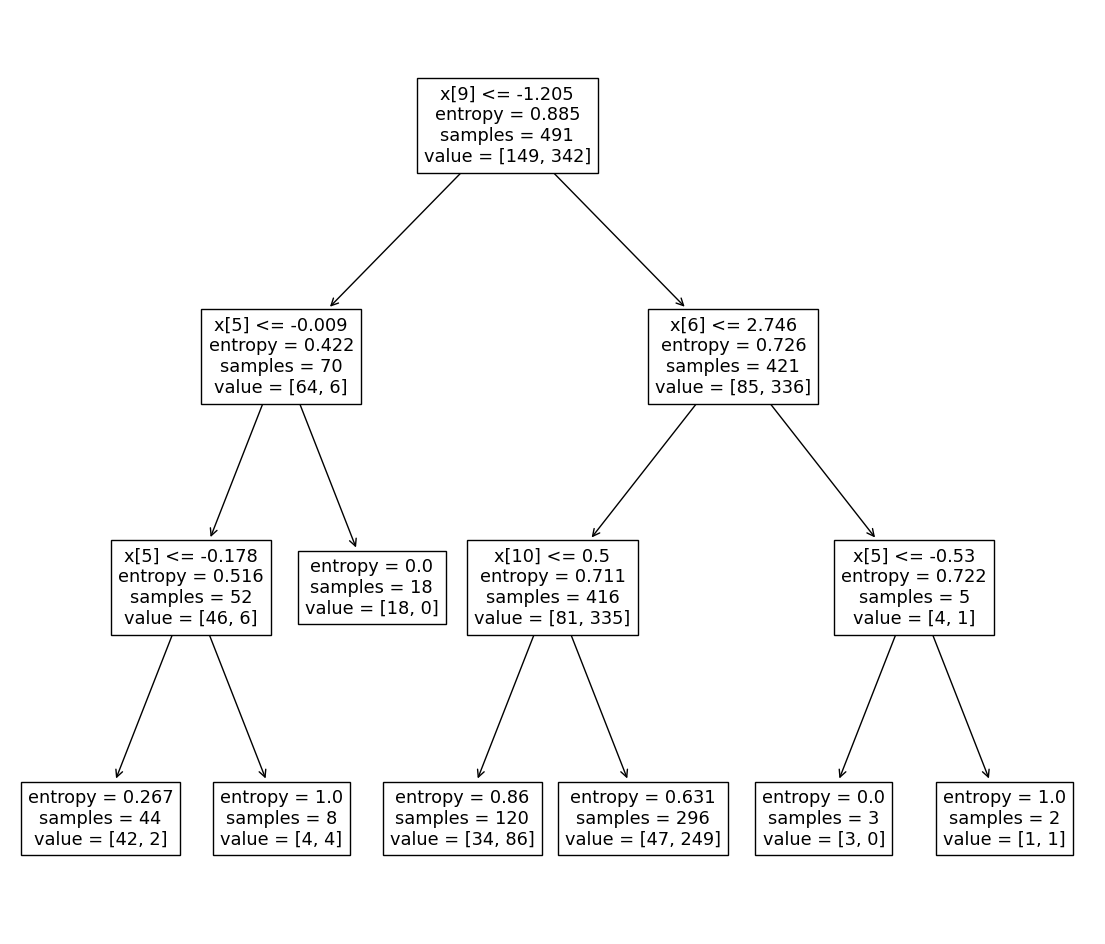

In [ ]:
#Menampilkan Gambar Decision Tree
fig = plt.figure(figsize=(14, 12))
plot_tree(dcf)
plt.show()